# Group 8_Election Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection

In [3]:
data=pd.read_csv('LS_2.0.csv')
data.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

# 2. Preprocessing

# 2.4 Feature Reduction and Processing

In [5]:
data.drop(['STATE', 'CONSTITUENCY', 'NAME', 'SYMBOL',
        'GENERAL\nVOTES', 'POSTAL\nVOTES','TOTAL\nVOTES', 
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1,inplace = True)
data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL\nCASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL ELECTORS'],
      dtype='object')

In [6]:
#cleaning data for liability coloumn
data['LIABILITIES'].replace(['Not Available','Nil','NIL',np.nan,'~','Telangana'],'0',inplace=True)
a=data['LIABILITIES'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b = a.apply(lambda x:x.split(','))
c = b.apply(lambda x:''.join(x))
data['LIABILITIES']=c
data['LIABILITIES'] = data['LIABILITIES'].astype(int)
data.dtypes

WINNER               int64
PARTY               object
GENDER              object
CRIMINAL\nCASES     object
AGE                float64
CATEGORY            object
EDUCATION           object
ASSETS              object
LIABILITIES          int32
TOTAL ELECTORS       int64
dtype: object

In [7]:
#renaming columns
data.columns = ['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS']
data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450,1489790
1,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000,1489790
2,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",15300000,1489790
3,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,1489790
4,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8606522,1937690


# 2.1. Missing Values Handling

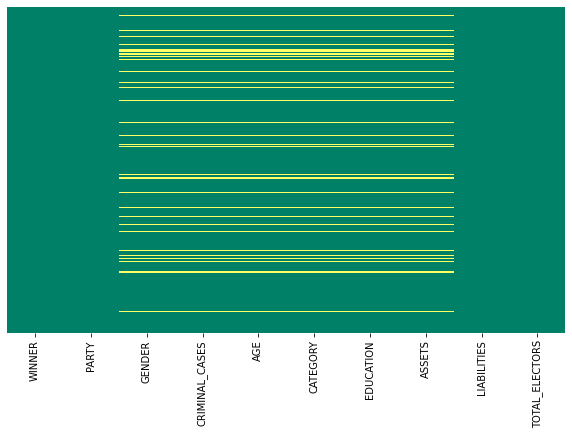

In [8]:
#visulaizing missing value columns
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False , cbar =False ,cmap ='summer')
plt.show()

In [9]:
#checking null values for each feature
data.isnull().sum()

WINNER              0
PARTY               0
GENDER            245
CRIMINAL_CASES    245
AGE               245
CATEGORY          245
EDUCATION         245
ASSETS            245
LIABILITIES         0
TOTAL_ELECTORS      0
dtype: int64

there is a strong chance that some rows have missing data in many features

even if we fill numerical values for criminal case, we cann't predict gender

so 245 rows are dropping

In [10]:
#dropping null values
data.dropna(inplace=True)
data.isnull().sum()

WINNER            0
PARTY             0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
ASSETS            0
LIABILITIES       0
TOTAL_ELECTORS    0
dtype: int64

now data is okay

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WINNER          2018 non-null   int64  
 1   PARTY           2018 non-null   object 
 2   GENDER          2018 non-null   object 
 3   CRIMINAL_CASES  2018 non-null   object 
 4   AGE             2018 non-null   float64
 5   CATEGORY        2018 non-null   object 
 6   EDUCATION       2018 non-null   object 
 7   ASSETS          2018 non-null   object 
 8   LIABILITIES     2018 non-null   int32  
 9   TOTAL_ELECTORS  2018 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 165.5+ KB


In [12]:
#criminal case feature has not available value
data['CRIMINAL_CASES']=data['CRIMINAL_CASES'].apply(lambda x:0 if x=='Not Available' else x)

# 2.2 Outlier Detection and Handling

Text(0.5, 1.0, 'Boxplot for AGE')

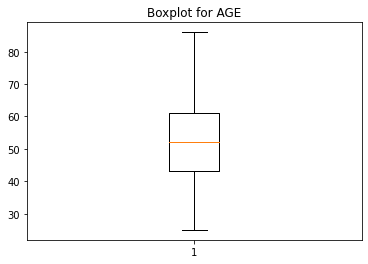

In [13]:
plt.boxplot(data['AGE'])
plt.title('Boxplot for AGE')

No outliers

Text(0.5, 1.0, 'Boxplot for LIABILITIES')

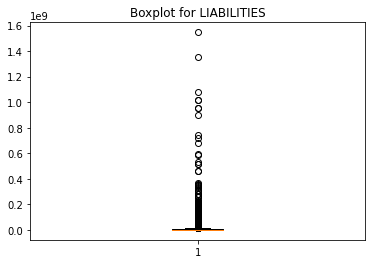

In [14]:
plt.boxplot(data['LIABILITIES'])
plt.title('Boxplot for LIABILITIES')

outliers present

In [15]:
Q1 = np.percentile(data['LIABILITIES'],25,interpolation = 'midpoint' )
Q2 = np.percentile(data['LIABILITIES'],50,interpolation = 'midpoint' )
Q3 = np.percentile(data['LIABILITIES'],75,interpolation = 'midpoint' )
print(Q1)
print(Q2)
print(Q3)

0.0
903924.5
6095941.5


In [16]:
data['LIABILITIES'].median()

903924.5

In [17]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR
print(low_lim)
print(Up_lim)

-9143912.25
15239853.75


In [18]:
# remove values below  above 
# create a loop to remove
outlier = []
for x in data['LIABILITIES']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[15300000,
 22251891,
 32549132,
 18943977,
 306012685,
 28095176,
 24739098,
 70576979,
 79139288,
 57940950,
 19579691,
 205591400,
 110928567,
 23667368,
 84550726,
 80450870,
 166365972,
 33409505,
 20565404,
 204955775,
 17925000,
 27622685,
 31390310,
 198464347,
 26510293,
 26784734,
 29242618,
 63341667,
 1079582000,
 312521957,
 45079101,
 38320377,
 104302653,
 15596951,
 519320305,
 34400000,
 46548771,
 15925213,
 16881608,
 954852600,
 198479638,
 225214094,
 22231164,
 21696413,
 54880849,
 19861338,
 28346352,
 24650224,
 151084000,
 45967727,
 24069129,
 42963534,
 49080220,
 1016148176,
 18604443,
 21940000,
 24777000,
 22752880,
 58992436,
 258028373,
 258386550,
 18087123,
 197007553,
 358127700,
 66870634,
 104316683,
 195595693,
 21635686,
 464721999,
 23686000,
 115756111,
 102828604,
 37268162,
 215617501,
 43113473,
 27428941,
 72681681,
 51736254,
 176677024,
 585784500,
 31474526,
 25302234,
 19391778,
 24438446,
 342035860,
 33560974,
 33303902,
 29371716,
 1

In [19]:
# find index of these outliers
# locate those in index columns
ind1 = data['LIABILITIES']>Up_lim
data.loc[ind1].index

Int64Index([   2,    5,    8,   13,   17,   32,   59,   65,   67,   74,
            ...
            2174, 2175, 2176, 2184, 2208, 2209, 2226, 2229, 2250, 2255],
           dtype='int64', length=311)

Text(0.5, 1.0, 'Boxplot for LIABILITIES')

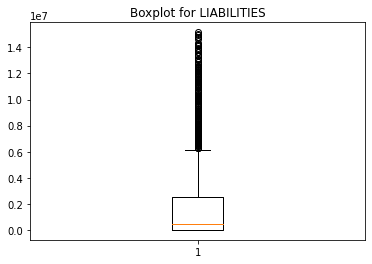

In [24]:
# drop it
data.drop(data.loc[ind1].index, inplace=True)
plt.boxplot(data['LIABILITIES'])
plt.title('Boxplot for LIABILITIES')

Reduced the outliers

In [20]:
data.shape

(2018, 10)

In [21]:
data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS'],
      dtype='object')

# Managing Catagorical Values

In [22]:
data[['PARTY','GENDER','CATEGORY','EDUCATION']].head()

,PARTY,GENDER,CATEGORY,EDUCATION
0,BJP,MALE,ST,12th Pass
1,TRS,MALE,ST,Post Graduate
2,INC,MALE,ST,12th Pass
4,BJP,MALE,SC,Doctorate
5,BSP,MALE,SC,Post Graduate


# 2.6 Feature Engineering

Checking feature PARTY

In [23]:
data['PARTY'].value_counts()

BJP       420
INC       413
IND       201
BSP       163
CPI(M)    100
         ... 
KEC(M)      1
KEC         1
JAPL        1
AKBMP       1
PHJSP       1
Name: PARTY, Length: 132, dtype: int64

132 parties, lets reduce this no.

In [24]:
data['PARTY']=data['PARTY'].apply(lambda x:x if data['PARTY'].value_counts().loc[x]>10 else 'Others')
data['PARTY'].value_counts()

BJP       420
INC       413
Others    251
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
MNM        36
SHS        26
AAP        25
TDP        25
YSRCP      25
DMK        23
NCP        21
AIADMK     21
RJD        21
BJD        21
JnP        20
JD(U)      18
TRS        17
Name: PARTY, dtype: int64

Now Education Feature

In [25]:
data['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

lets reduce its numbers

In [26]:
ill = ['Others','Not Available','Illiterate','Post Graduate\n']
data['EDUCATION']=data['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
data['EDUCATION'].value_counts()


Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
Illiterate                78
8th Pass                  78
Doctorate                 73
Literate                  30
5th Pass                  28
Name: EDUCATION, dtype: int64

In [27]:
data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450,1489790
1,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000,1489790
2,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",15300000,1489790
4,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8606522,1937690
5,0,BSP,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+",22251891,1937690


# 2.3 Encoding

In [28]:
dummy = pd.get_dummies(data[['GENDER','CATEGORY','PARTY','EDUCATION']],drop_first =True)
feature_data = pd.concat([data,dummy],axis=1)
feature_data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450,1489790,...,0,1,0,0,0,0,0,0,0,0
1,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000,1489790,...,0,0,0,0,0,0,0,0,0,1
2,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",15300000,1489790,...,0,1,0,0,0,0,0,0,0,0
4,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8606522,1937690,...,0,0,0,0,1,0,0,0,0,0
5,0,BSP,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+",22251891,1937690,...,0,0,0,0,0,0,0,0,0,1


drops previous catagorical columns

In [29]:
feature_data.drop(['PARTY','GENDER','CATEGORY','EDUCATION'],axis=1, inplace =True)
# final data
feature_data.head()


,WINNER,CRIMINAL_CASES,AGE,ASSETS,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,52,52.0,"Rs 30,99,414\n ~ 30 Lacs+",231450,1489790,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,54.0,"Rs 1,84,77,888\n ~ 1 Crore+",847000,1489790,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,3,52.0,"Rs 3,64,91,000\n ~ 3 Crore+",15300000,1489790,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,5,58.0,"Rs 7,42,74,036\n ~ 7 Crore+",8606522,1937690,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,47.0,"Rs 13,37,84,385\n ~ 13 Crore+",22251891,1937690,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df = feature_data.copy()

Training and Test Data Spliting

In [31]:
# split the dataset
X = df.drop(['WINNER','ASSETS'],axis=1)
y = df['WINNER']
# print x
X

,CRIMINAL_CASES,AGE,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,PARTY_AITC,PARTY_BJD,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,52,52.0,231450,1489790,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,54.0,847000,1489790,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,52.0,15300000,1489790,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,58.0,8606522,1937690,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,47.0,22251891,1937690,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0,28.0,9000,1916185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2258,0,43.0,1020000,1916185,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2259,18,63.0,11535000,1498666,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2260,0,49.0,0,1498666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# print y
y

0       1
1       0
2       0
4       1
5       0
       ..
2257    0
2258    0
2259    1
2260    0
2261    0
Name: WINNER, Length: 2018, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42,test_size =0.25)
X_train.shape

(1513, 38)

In [34]:
X_test.shape

(505, 38)

# 2.5 Standarzing the features (Data Normalisation)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train.shape

(1513, 38)

# 3. Data Anaylsis

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WINNER          2018 non-null   int64  
 1   PARTY           2018 non-null   object 
 2   GENDER          2018 non-null   object 
 3   CRIMINAL_CASES  2018 non-null   object 
 4   AGE             2018 non-null   float64
 5   CATEGORY        2018 non-null   object 
 6   EDUCATION       2018 non-null   object 
 7   ASSETS          2018 non-null   object 
 8   LIABILITIES     2018 non-null   int32  
 9   TOTAL_ELECTORS  2018 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 165.5+ KB


In [37]:
data.describe()

,WINNER,AGE,LIABILITIES,TOTAL_ELECTORS
count,2018.000000,2018.000000,2.018000e+03,2.018000e+03
mean,0.267096,52.273538,1.973860e+07,1.660261e+06
std,0.442553,11.869373,8.945292e+07,3.164246e+05
min,0.000000,25.000000,0.000000e+00,5.518900e+04
25%,0.000000,43.250000,0.000000e+00,1.530404e+06
50%,0.000000,52.000000,9.039245e+05,1.679891e+06
75%,1.000000,61.000000,6.097971e+06,1.823404e+06
max,1.000000,86.000000,1.547511e+09,3.150313e+06


india has highest number of young voters. Lets the distribution in 2019 Election

# Age Distribution

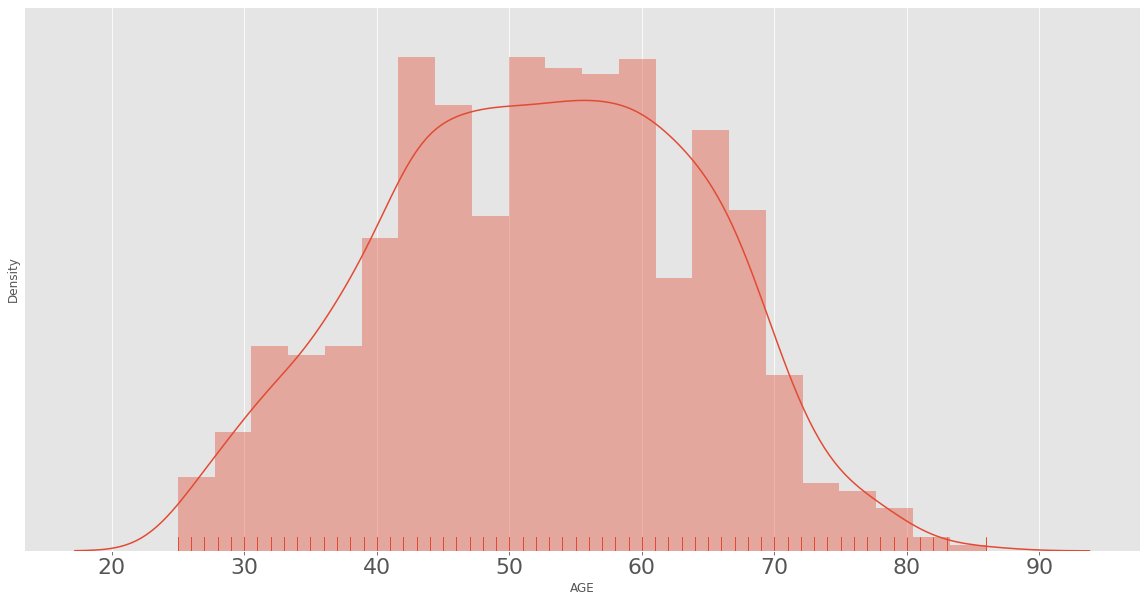

In [39]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.distplot(data['AGE'],rug=True)
            
plt.yticks([])
plt.xticks(fontsize=22)
plt.show()

From fig, average age is around 50 and is normally distributed

# Number of candidates by top 10 party

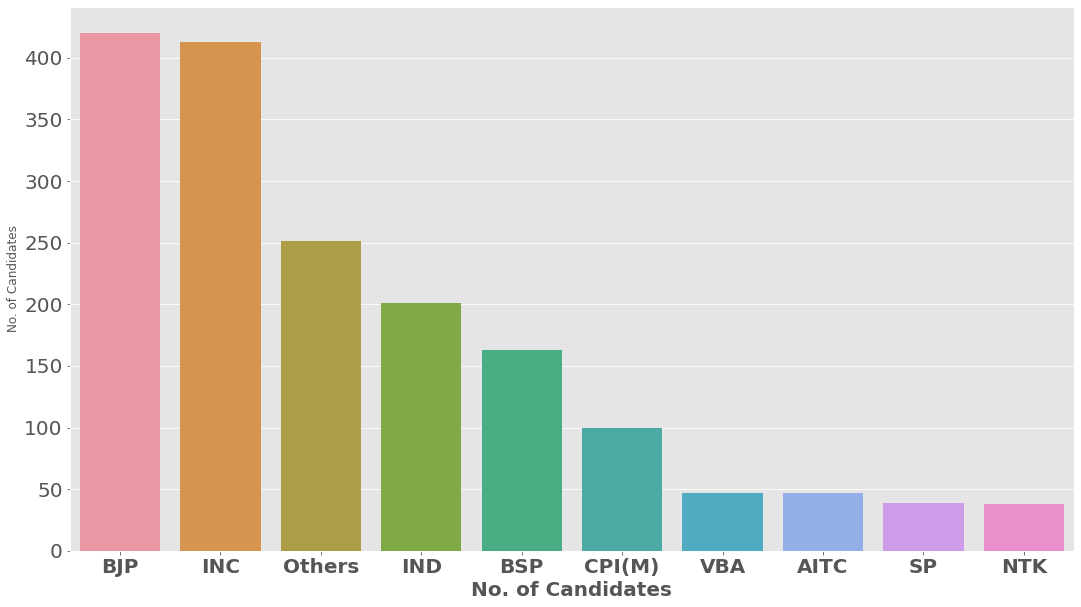

In [40]:
plt.figure(figsize=(18,10))
sns.countplot(x='PARTY',data=data,order=data.PARTY.value_counts().iloc[:10].index)
plt.ylabel('No. of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party',fontsize=20,fontweight = 'bold')
plt.xlabel('No. of Candidates',fontsize=20,fontweight = 'bold')
plt.show()

# Gender Distribution of Candidates

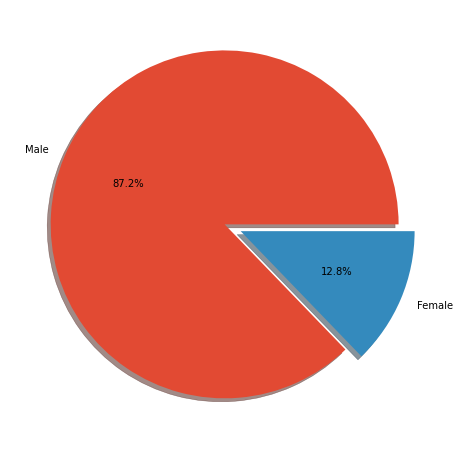

In [42]:
plt.figure(figsize=(16,8))
plt.pie(data['GENDER'].value_counts(),labels =['Male','Female'],explode = (0, 0.1),shadow=True,autopct='%1.1f%%')
plt.show()

# Age Distribution of Candidates wrt gender and catagory

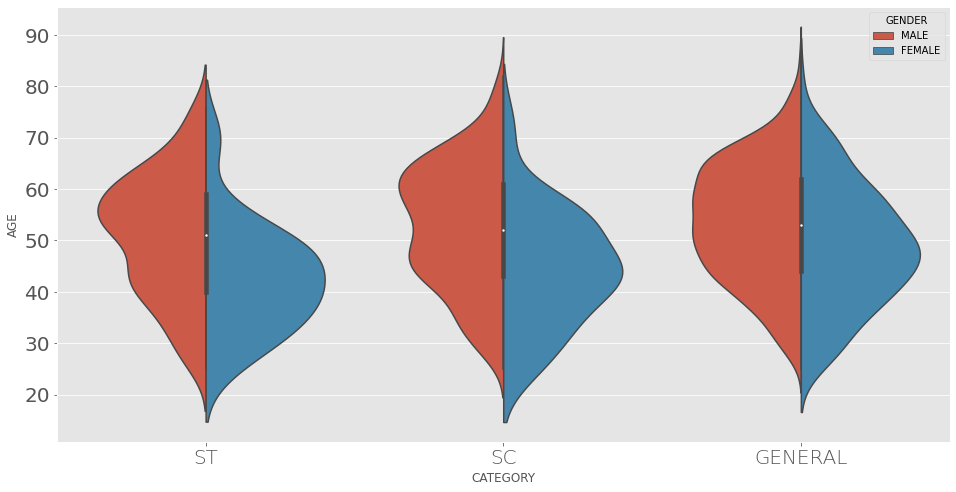

In [43]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=data,hue='GENDER',split=True)
plt.xticks(fontsize=20,fontweight=200)
plt.yticks(fontsize=20)
plt.show()

# Analyzing the age distribution of candidates of the top 15 parties

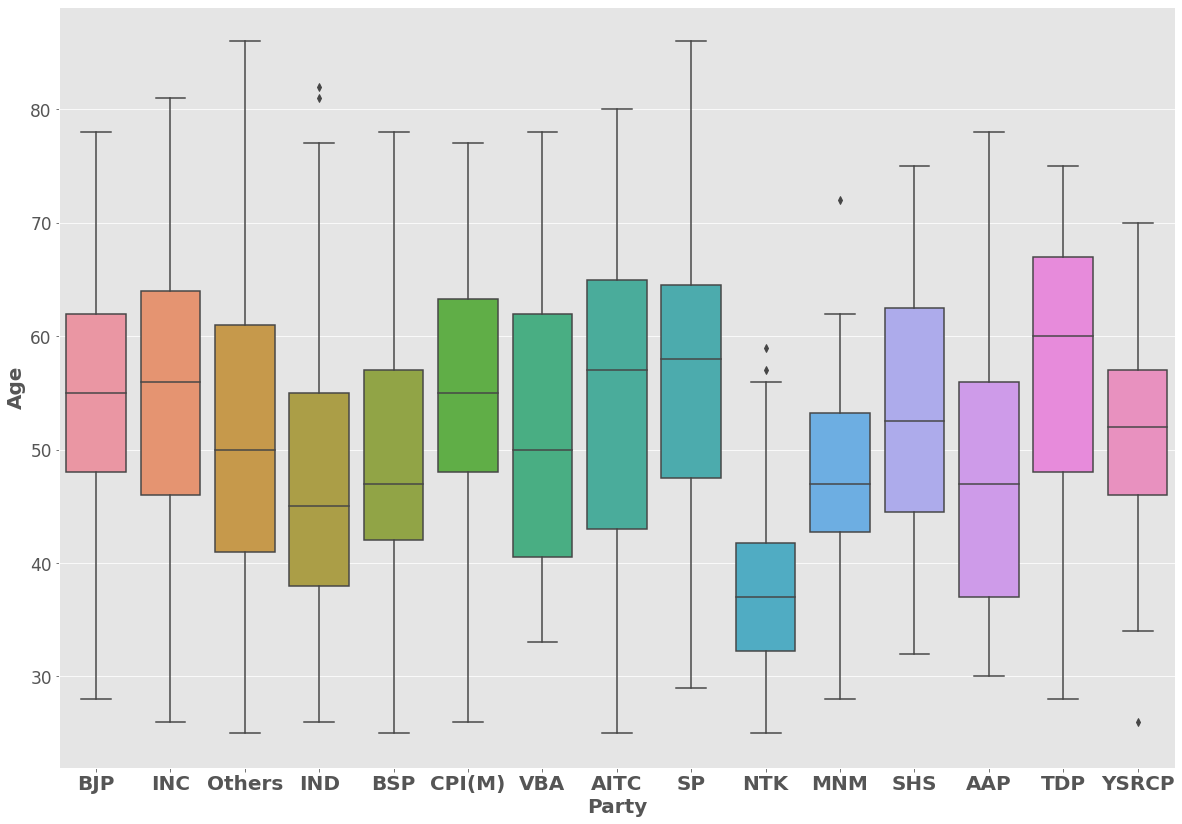

In [44]:
plt.figure(figsize=(20,14))
sns.boxplot(x='PARTY',y='AGE',data=data,order=data.PARTY.value_counts().iloc[:15].index)
plt.xlabel('Party')
plt.ylabel('Age')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=17)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.ylabel('Age',fontsize=20,fontweight='bold')
plt.show()

clearly, 'AITC' and 'VBA' has the most distributed candisates with their age., and NTK has youngest candiates

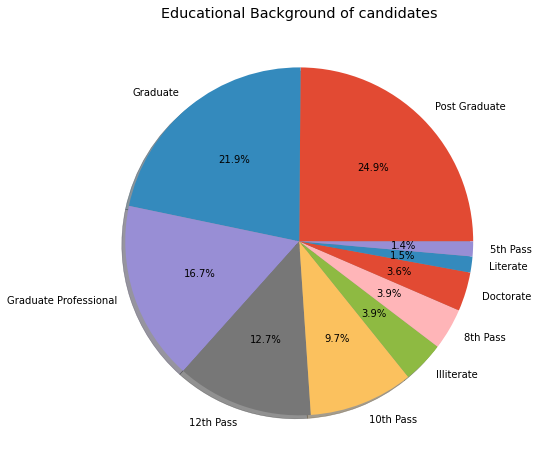

In [45]:
labels=list(dict(data['EDUCATION'].value_counts()))
d1=list(data['EDUCATION'].value_counts())
plt.figure(figsize=(16,8))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()

# 4. MODELLING

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

Predict on Test Set

In [48]:
y_pred = logit_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Measuring Accuracy

In [49]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8594059405940594


In [50]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[328,  34],
       [ 37, 106]], dtype=int64)

KNN Regression

In [51]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors =k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.8376237623762376,
 0.8277227722772277,
 0.8495049504950495,
 0.8514851485148515,
 0.8455445544554455,
 0.8475247524752475,
 0.8356435643564356,
 0.8396039603960396,
 0.8396039603960396,
 0.8435643564356435,
 0.8495049504950495,
 0.8514851485148515]

Text(0, 0.5, 'accuracy')

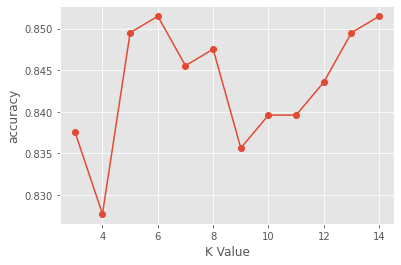

In [52]:
# check for which k value , we get highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [53]:
classifier =KNeighborsClassifier(n_neighbors = 11, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

Measuring Accurancy for KNN

In [54]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8396039603960396


In [55]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[327,  35],
       [ 46,  97]], dtype=int64)

In [56]:
df.describe()

,WINNER,AGE,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,PARTY_AITC,PARTY_BJD,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
count,2018.000000,2018.000000,2.018000e+03,2.018000e+03,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.267096,52.273538,1.973860e+07,1.660261e+06,0.872151,0.189792,0.120416,0.010406,0.023290,0.010406,...,0.012389,0.126858,0.013875,0.038652,0.036174,0.218533,0.166501,0.038652,0.014866,0.248761
std,0.442553,11.869373,8.945292e+07,3.164246e+05,0.334005,0.392234,0.325528,0.101504,0.150862,0.101504,...,0.110639,0.332897,0.117002,0.192812,0.186770,0.413353,0.372623,0.192812,0.121047,0.432402
min,0.000000,25.000000,0.000000e+00,5.518900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,43.250000,0.000000e+00,1.530404e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,9.039245e+05,1.679891e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,6.097971e+06,1.823404e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,86.000000,1.547511e+09,3.150313e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.7940594059405941


In [58]:
confusion_matrix(y_test,y_pred)

array([[311,  51],
       [ 53,  90]], dtype=int64)

SVM

Linear SVM

In [59]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ='linear')
svm_linear.fit(X_train,y_train)
y_pred =svm_linear.predict(X_test)
print('Accuracy using linear svm is: ',accuracy_score(y_test,y_pred))

Accuracy using linear svm is:  0.8534653465346534


Random Forest

In [60]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8574257425742574


Gradient Boosting

In [61]:
from sklearn.ensemble  import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8574257425742574


Since all has similar accuracy, lets choose random forest and finde tune it

# 5. MODEL FINE TUNING

In [63]:
clf=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [64]:
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8554455445544554


There is an improvement in our accuracy of model

Gradient Boosting Fine Tuning

In [65]:
gb = GradientBoostingClassifier(max_depth=10,learning_rate=.5,n_estimators=500)
gb.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8554455445544554


incresed accuracy